# Intrusion Detection Systems using SVM Kernels

<p>This Jupyter Notebook is a comprehensive guide to implementing Intrusion Detection Systems (IDS) using Support Vector Machine (SVM) kernels. The main topics covered in this Notebook are:</p>
<ol>
    <li>Importing Modules and Defining Functions</li>
    <li>Importing and Exploring the Dataset</li>
    <li>Feature Selection</li>
    <li>SVM Modeling</li>
    <li>Grid Search</li>
    <li>Conclusion</li>
</ol>


## Importing Module and Defining Functions

<p>The following imports are commonly used in data science and machine learning tasks and will be included in a Jupyter notebook:</p>

<ol>
    <li>import pandas as pd: This imports the Pandas library, which is a powerful data manipulation tool used to work with structured data. It is commonly used to read, write and manipulate data in data frames or tables.</li>
    <li>import numpy as np: This imports the NumPy library, which is a fundamental package for scientific computing in Python. It is commonly used to work with arrays and matrices of numerical data.</li>
    <li>import scikitplot as skplt: This imports the Scikit-plot library, which provides an intuitive interface for working with various Scikit-learn plots.</li>
    <li>import matplotlib.pyplot as plt: This imports the Matplotlib library, which is a plotting library used to create static, animated, and interactive visualizations in Python.</li>
    <li>import warnings: This is a built-in Python library that provides a way to handle warnings.</li>
    <li>from sklearn import svm: This imports the SVM module from the Scikit-learn library, which provides implementation of Support Vector Machines for classification and regression.</li>
    <li>from sklearn.preprocessing import StandardScaler: This imports the StandardScaler module from the Scikit-learn library, which provides a way to standardize features by removing the mean and scaling to unit variance.</li>
    <li>from sklearn.pipeline import make_pipeline: This imports the make_pipeline function from the Scikit-learn library, which provides a way to construct a pipeline of machine learning models.</li>
    <li>from sklearn.svm import SVC: This imports the SVC module from the Scikit-learn library, which is a Support Vector Machine implementation for classification.</li>
    <li>from sklearn.model_selection import train_test_split, GridSearchCV: This imports the train_test_split and GridSearchCV modules from the Scikit-learn library, which provides a way to split the data into training and testing sets and perform grid search to find the best hyperparameters, respectively.</li>
    <li>from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2: This imports the SelectKBest, mutual_info_classif, and chi2 modules from the Scikit-learn library, which provides a way to select the most relevant features from a dataset using various feature selection techniques.</li>
    <li>from sklearn.metrics import classification_report: This imports the classification_report function from the Scikit-learn library, which provides a way to evaluate the performance of a classification model.</li>
    <li>from sklearn.ensemble import ExtraTreesClassifier: This imports the ExtraTreesClassifier module from the Scikit-learn library, which is an ensemble learning method used for classification.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
import warnings
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

<p>The code snippet below includes several settings that can be used in data analysis and visualization using Python libraries such as Pandas, Matplotlib, and Warnings. Here's a breakdown of each line:<p>
<ol>
<li>pd.set_option('display.max_rows', None): This line sets the maximum number of rows to display in Pandas data frames to be unlimited. This means that all rows in a data frame will be shown when it is printed to the console.</li>
<li>pd.set_option('display.max_columns', None): Similarly to the previous line, this sets the maximum number of columns to display in Pandas data frames to be unlimited. This means that all columns in a data frame will be shown when it is printed to the console.</li>
<li>plt.rcParams["figure.figsize"] = (15,15): This line sets the default figure size for Matplotlib plots to be 15 inches by 15 inches. This means that any plot created using Matplotlib will have a default size of 15 inches by 15 inches unless otherwise specified.</li>
<li>warnings.filterwarnings('ignore'): This line suppresses warnings that may be generated by Python or its libraries. It is generally not recommended to suppress warnings, as they can provide valuable information about potential issues with code, but in some cases it may be useful to ignore certain warnings for debugging or presentation purposes.</li>
</ol>

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (15,15)
warnings.filterwarnings('ignore')

<p>
def getRanges(data): This function takes in a Pandas DataFrame and returns a dictionary where each key is a column name and the corresponding value is the range of values in that column (i.e. the difference between the maximum and minimum values). It only considers columns that have numeric data types (int64 or float64).

def getCategoricalValues(data): This function takes in a Pandas DataFrame and returns a dictionary where each key is a column name and the corresponding value is an array of the unique categorical values in that column. It only considers columns that have an object data type (i.e. strings).

def select_features(X_train, y_train, X_test, k_value='all'): This function takes in the training and testing data sets along with a value for k_value, which determines the number of features to select for the model. It uses the SelectKBest function from the sklearn.feature_selection module to select the k_value best features based on their mutual information score with the target variable y_train. The function returns the transformed training and testing data sets with only the selected features, as well as the SelectKBest object fs, which contains the scores and p-values for all features.
</p>

In [3]:
def getRanges(data):
    ranges={}
    for c in data.columns:
        if data[c].dtype=='int64' or data[c].dtype=='float64':
            ranges[c]=(data[c].max()-data[c].min())
    return ranges

def getCategoricalValues(data):
    categoricalVals={}
    for c in data.columns:
        if data[c].dtype=='object':
            categoricalVals[c]=data[c].unique()
            print(f'{c} : {sorted(list(data[c].unique()))} \n count = {len(list(data[c].unique()))} \n')
    return categoricalVals

def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=mutual_info_classif, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

## Importing Dataset

<p> 
The code below reads in two CSV files, KDDTrain+.csv and KDDTest+.csv, which contain data related to network intrusion detection. Here's a breakdown of each line:
<ol>
<li>dfTrain = pd.read_csv('nsl-kdd/KDDTrain+.csv'): This line reads in the KDDTrain+.csv file using the Pandas read_csv function, which converts the CSV file to a Pandas data frame. The resulting data frame is assigned to the variable dfTrain.</li>
<li>dsTrain = dfTrain.copy(): This line creates a copy of the dfTrain data frame and assigns it to the variable dsTrain. This is often done to create a new data frame that can be modified without affecting the original data frame.</li>
<li>dfTest = pd.read_csv('nsl-kdd/KDDTest+.csv'): This line reads in the KDDTest+.csv file using the Pandas read_csv function, which converts the CSV file to a Pandas data frame. The resulting data frame is assigned to the variable dfTest.</li>
<li>dsTest = dfTest.copy(): This line creates a copy of the dfTest data frame and assigns it to the variable dsTest. This is often done to create a new data frame that can be modified without affecting the original data frame.</li>
</ol>

In [4]:
dfTrain = pd.read_csv('nsl-kdd_labels/kdd_train.csv')
dsTrain = dfTrain.copy()
dfTest = pd.read_csv('nsl-kdd_labels/kdd_test.csv')
dsTest = dfTest.copy()

## Exploring Dataset

### Train Data

In [5]:
dsTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
dsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
dsTrain.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
getRanges(dsTrain)

{'duration': 42908,
 'src_bytes': 1379963888,
 'dst_bytes': 1309937401,
 'land': 1,
 'wrong_fragment': 3,
 'urgent': 3,
 'hot': 77,
 'num_failed_logins': 5,
 'logged_in': 1,
 'num_compromised': 7479,
 'root_shell': 1,
 'su_attempted': 2,
 'num_root': 7468,
 'num_file_creations': 43,
 'num_shells': 2,
 'num_access_files': 9,
 'num_outbound_cmds': 0,
 'is_host_login': 1,
 'is_guest_login': 1,
 'count': 511,
 'srv_count': 511,
 'serror_rate': 1.0,
 'srv_serror_rate': 1.0,
 'rerror_rate': 1.0,
 'srv_rerror_rate': 1.0,
 'same_srv_rate': 1.0,
 'diff_srv_rate': 1.0,
 'srv_diff_host_rate': 1.0,
 'dst_host_count': 255,
 'dst_host_srv_count': 255,
 'dst_host_same_srv_rate': 1.0,
 'dst_host_diff_srv_rate': 1.0,
 'dst_host_same_src_port_rate': 1.0,
 'dst_host_srv_diff_host_rate': 1.0,
 'dst_host_serror_rate': 1.0,
 'dst_host_srv_serror_rate': 1.0,
 'dst_host_rerror_rate': 1.0,
 'dst_host_srv_rerror_rate': 1.0}

### Test Data

In [9]:
dsTest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,180,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,269,0.0,0.0,0.0,0.0,0.99,0.01,0.01,194,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,121,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.00,0.00,0.00,255,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [10]:
dsTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [11]:
dsTest.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
getRanges(dsTest)

{'duration': 54451,
 'src_bytes': 62825648,
 'dst_bytes': 5153771,
 'land': 1,
 'wrong_fragment': 3,
 'urgent': 2,
 'hot': 30,
 'num_failed_logins': 5,
 'logged_in': 1,
 'num_compromised': 796,
 'root_shell': 1,
 'su_attempted': 2,
 'num_root': 878,
 'num_file_creations': 43,
 'num_shells': 2,
 'num_access_files': 8,
 'num_outbound_cmds': 0,
 'is_host_login': 1,
 'is_guest_login': 1,
 'count': 511,
 'srv_count': 511,
 'serror_rate': 1.0,
 'srv_serror_rate': 1.0,
 'rerror_rate': 1.0,
 'srv_rerror_rate': 1.0,
 'same_srv_rate': 1.0,
 'diff_srv_rate': 1.0,
 'srv_diff_host_rate': 1.0,
 'dst_host_count': 254,
 'dst_host_srv_count': 254,
 'dst_host_same_srv_rate': 1.0,
 'dst_host_diff_srv_rate': 1.0,
 'dst_host_same_src_port_rate': 1.0,
 'dst_host_srv_diff_host_rate': 1.0,
 'dst_host_serror_rate': 1.0,
 'dst_host_srv_serror_rate': 1.0,
 'dst_host_rerror_rate': 1.0,
 'dst_host_srv_rerror_rate': 1.0}

In [13]:
getCategoricalValues(dsTrain)
print("TRAIN DATA")

protocol_type : ['icmp', 'tcp', 'udp'] 
 count = 3 

service : ['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'] 
 count = 70 

flag : ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'] 
 count = 11 

labels : ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'nor

In [14]:
getCategoricalValues(dsTest)
print("TEST DATA")

protocol_type : ['icmp', 'tcp', 'udp'] 
 count = 3 

service : ['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'] 
 count = 66 

flag : ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'] 
 count = 11 

labels : ['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb', 'mscan', 'multihop', 'named', 'neptune', 'nma

## Encoding

In [15]:
valuesToEncode = getCategoricalValues(dsTrain)
valuesToEncode.pop("labels")
items = getCategoricalValues(dsTest)
items['labels'] = np.append(items['labels'], 'spy')
items.pop('protocol_type')
items.pop('service')
items.pop('flag')
valuesToEncode.update(items)

protocol_type : ['icmp', 'tcp', 'udp'] 
 count = 3 

service : ['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'] 
 count = 70 

flag : ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'] 
 count = 11 

labels : ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'nor

In [16]:
valuesToEncode

{'protocol_type': array(['tcp', 'udp', 'icmp'], dtype=object),
 'service': array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
        'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
        'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
        'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
        'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
        'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
        'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
        'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
        'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
        'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
        'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object),
 'flag': array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
        'S2', 'OTH'], dtype=object),
 'labels': array(['normal'

In [22]:
def encodeData(data):
    data["protocol_type"].replace(
        valuesToEncode["protocol_type"], [1, 2, 3], inplace=True
    )
    data["service"].replace(valuesToEncode["service"], list(range(1, 71)), inplace=True)
    data["flag"].replace(valuesToEncode["flag"], list(range(1, 12)), inplace=True)
    data["labels"].replace(valuesToEncode["labels"], list(range(1, 38)), inplace=True)

In [23]:
encodeData(dsTrain)
dsTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,1,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,2,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,3
3,0,1,4,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,4,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [24]:
encodeData(dsTest)
dsTest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,1,16,1,2429,475,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,180,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,1
1,0,2,12,1,45,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,269,0.0,0.0,0.0,0.0,0.99,0.01,0.01,194,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,1
2,0,2,12,1,45,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,121,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,1
3,1979,2,2,1,145,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,1
4,14462,1,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.00,0.00,0.00,255,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,2


## Feature Selection

In [25]:
x = dsTrain.drop(["labels"], axis=1)
y = dsTrain["labels"]

In [26]:
model = ExtraTreesClassifier()
model.fit(x, y)

ExtraTreesClassifier()

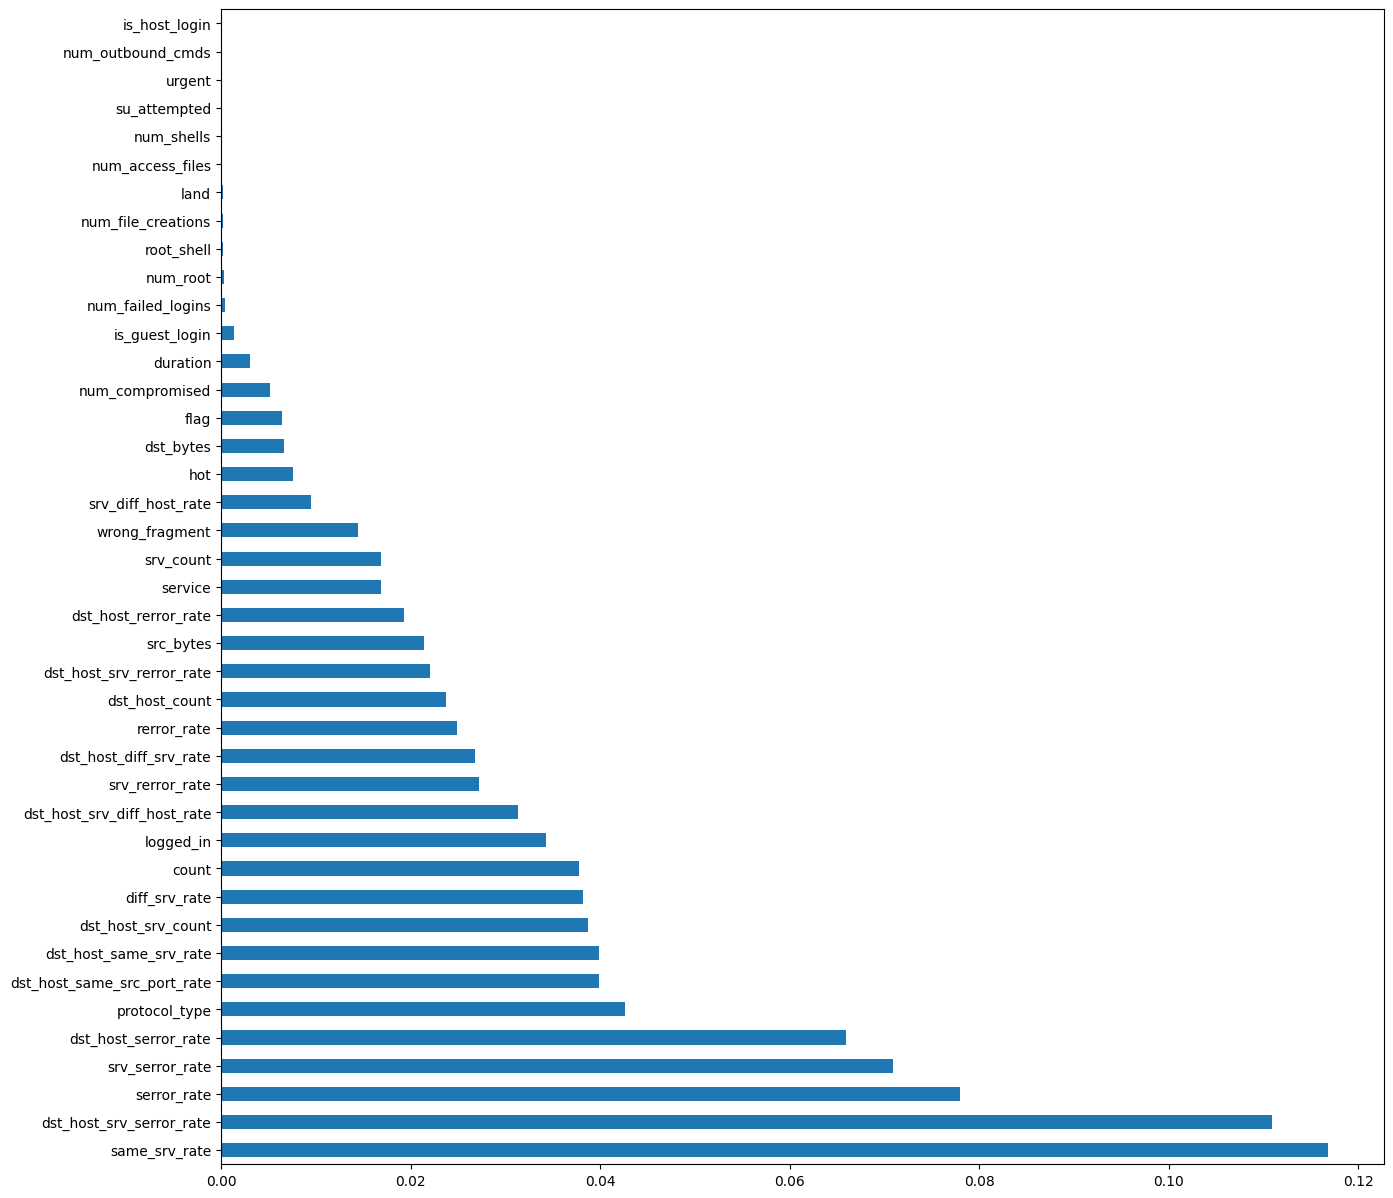

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(42).plot(kind="barh")
plt.show()

In [29]:
feat_importances.nsmallest(30)

num_outbound_cmds              0.000000
is_host_login                  0.000000
urgent                         0.000032
su_attempted                   0.000040
num_shells                     0.000061
num_access_files               0.000075
land                           0.000162
num_file_creations             0.000177
root_shell                     0.000228
num_root                       0.000276
num_failed_logins              0.000459
is_guest_login                 0.001346
duration                       0.003059
num_compromised                0.005115
flag                           0.006403
dst_bytes                      0.006646
hot                            0.007617
srv_diff_host_rate             0.009497
wrong_fragment                 0.014401
srv_count                      0.016878
service                        0.016916
dst_host_rerror_rate           0.019319
src_bytes                      0.021405
dst_host_srv_rerror_rate       0.022013
dst_host_count                 0.023759


In [30]:
unimportant = [
    "num_outbound_cmds",
    "is_host_login",
    "su_attempted",
    "urgent",
    "num_shells",
    "num_access_files",
    "land",
    "num_file_creations",
]

dtTrain = dsTrain.drop(unimportant, axis=1)
dtTest = dsTest.drop(unimportant, axis=1)

## Modeling (linear Kernel SVC)

Training the model:

In [31]:
x = dtTrain.drop(["labels"], axis=1)
y = dtTrain["labels"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
clf = make_pipeline(StandardScaler(), SVC(kernel="linear", degree=5))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=5, kernel='linear'))])

In [33]:
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9879338744567266
0.9864655685651915


Testing the model with new data:

In [34]:
X_test = dtTest.drop(["labels"], axis=1)
Y_test = dtTest["labels"]

In [35]:
Y_predict = clf.predict(X_test)

In [36]:
Y_test.replace(list(range(1, 38)), valuesToEncode["labels"], inplace=True)
Y_predict = pd.Series(Y_predict)
Y_predict.replace(list(range(1, 38)), valuesToEncode["labels"], inplace=True)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

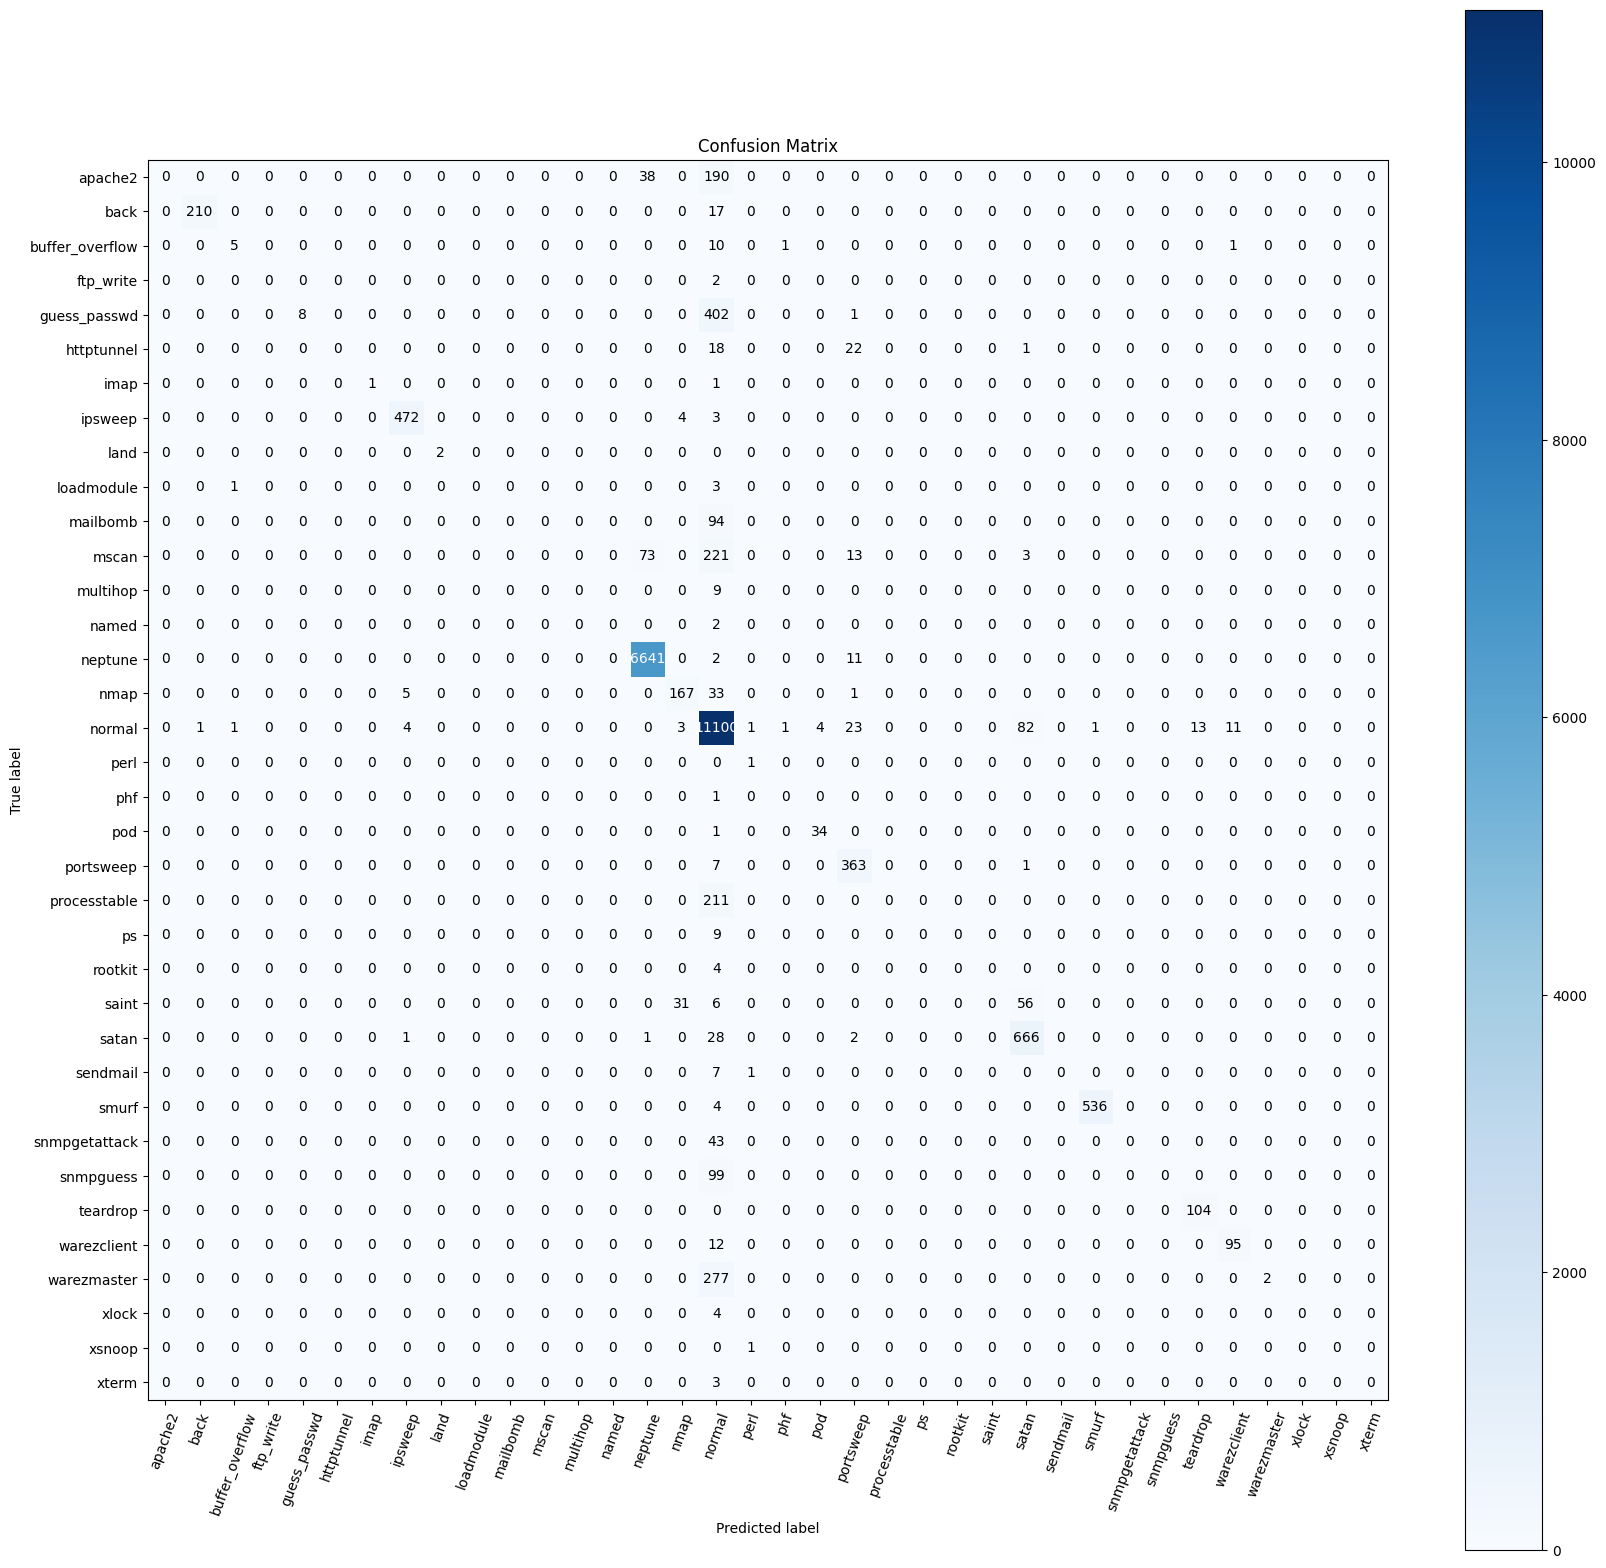

In [37]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_predict, figsize=(20, 20), x_tick_rotation=70)

In [38]:
print(classification_report(Y_test, Y_predict))

                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       228
           back       1.00      0.93      0.96       227
buffer_overflow       0.71      0.29      0.42        17
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       1.00      0.02      0.04       411
     httptunnel       0.00      0.00      0.00        41
           imap       1.00      0.50      0.67         2
        ipsweep       0.98      0.99      0.98       479
           land       1.00      1.00      1.00         2
     loadmodule       0.00      0.00      0.00         4
       mailbomb       0.00      0.00      0.00        94
          mscan       0.00      0.00      0.00       310
       multihop       0.00      0.00      0.00         9
          named       0.00      0.00      0.00         2
        neptune       0.98      1.00      0.99      6654
           nmap       0.81      0.81      0.81       206
         normal       0.87    